## Project Name- Predecting Student Performance
**Project Type** -EDA/Regression

**Team Members**

**Member 1-** 2210992370

**Member 2-** 2210992408

**Member 3-** 2210992361

**Member 4-** 2210992367

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Loading Dataset

In [2]:
df=pd.read_csv('exams.csv')

## first view of dataset

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


## DataSet Rows And Columns count

In [8]:
df.shape

(1000, 8)

## Data Set Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.duplicated().sum()

0

### Missing Values Count

In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

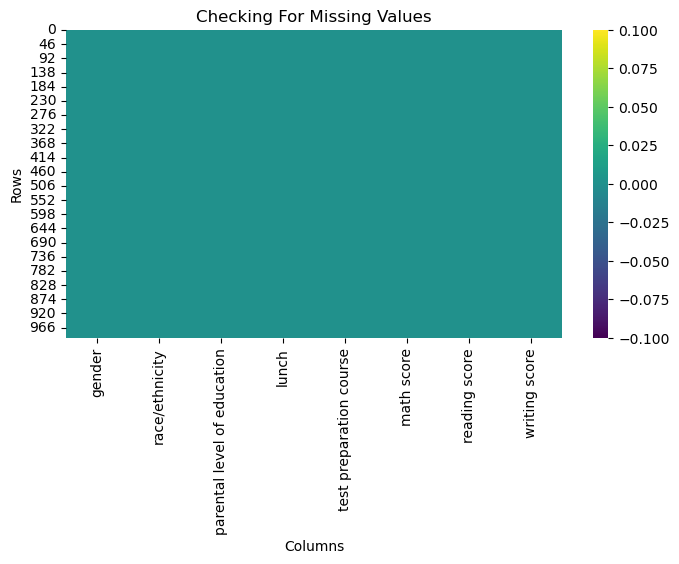

In [16]:
# Visualizing the missing values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Checking For Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
# missing values are represented by colored cells. Cells with missing values will be a different color compared to cells with actual data, making it easy to visualize where missing values occur in our dataset.
#from above analysis we know we dont have any missing values though,thus we expect a monochromatic heatmap (single colored map)

### Our dataset have no missing and null values hence we do not need to handle them

## OurVariables

In [18]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## Variable Description

We have five categorical and three numerical variables.

CATEGORICAL:

(1) Gender: Gender of the student (e.g., male or female).

(2) Race/Ethnicity: Ethnic background or race of the student (e.g., Group A, Group B, etc.).

(3) Educational background: Parental Level of Education: Education level of the student's parents or guardians (e.g., some high school, bachelor's degree, etc.).

(4) Lunch: Whether the student receives free/reduced-price lunch or not, which can serve as an indicator of socioeconomic status.

(5) Test preparation course: whether the student has opted for and completed the test preparation course or not.

NUMERICAL:

(1)Math Score: The score achieved by the student in the mathematics exam.

(2)Reading Score: The score achieved by the student in the reading exam.

(3)Writing Score: The score achieved by the student in the writing exam.

In [21]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,508,323,224,660,656,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000
std,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917
min,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000
25%,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000


In [28]:
# checking for unique values
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [29]:
df['race/ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [30]:
df['parental level of education'].unique()

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [31]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [33]:
df['math score'].unique()

array([ 59,  96,  57,  70,  83,  68,  82,  46,  80,  74,  53,  76,  55,
        56,  35,  87,  65,  66,  67,  89,  99,  58,  90,  69,  32,  86,
        52,  63,  62,  79,  71,  61,  75,  73,  64,  23,  41,  84,  85,
        88,  91,  51, 100,  48,  98,  72,  43,  50,  38,  81,  47,  49,
        44,  60,  93,  77,  20,  78,  94,  39,  42,  54,  37,  45,  27,
        92,  95,  34,  97,  31,  40,  33,  21,  25,  28,  15,  24,  30,
        36], dtype=int64)

In [34]:
df['reading score'].unique()

array([ 70,  93,  76,  85,  57,  83,  61,  75,  69,  50,  74,  73,  54,
        46,  47,  92,  82,  71,  66,  88,  52,  79,  87,  81,  78,  35,
        53,  56,  77,  72,  67,  64,  86,  68,  34,  91,  62,  33,  58,
        49,  80,  89,  97,  65,  51,  96,  84,  90,  95,  55,  60,  99,
        45,  63,  98,  40,  94,  59,  48,  25,  39,  43,  44,  27, 100,
        42,  30,  32,  38,  41,  37], dtype=int64)

In [35]:
df['writing score'].unique()

array([ 78,  87,  77,  63,  86,  54,  80,  58,  73,  69,  49,  76,  70,
        52,  43,  41,  81,  85,  74,  62,  71,  88,  72,  51,  59,  79,
        75,  37,  82,  48,  67,  65,  90,  68,  56,  84,  61,  93,  66,
        36,  57,  33,  46,  89,  95,  42,  91,  60,  38,  83,  97,  64,
        53, 100,  55,  47,  50,  94,  44,  99,  92,  15,  40,  98,  19,
        96,  35,  32,  26,  28,  45,  27,  30,  23], dtype=int64)

## Data Wrangling

In [36]:
#Addding two columns i.e.,total and average
df['total']=df['math score']+df['reading score'] +df['writing score']
df['average']=df['total']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [38]:
#sorting female student
fstudents=df[(df['gender']=='female')]
fstudents.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667
6,female,group E,associate's degree,standard,none,82,83,80,245,81.666667
7,female,group B,some high school,standard,none,46,61,58,165,55.000000


In [39]:
#Number of female Students
fstudents.shape[0]

492

In [40]:
#Sorting Male Student records
mstudents=df[(df['gender']=='male')]
mstudents.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
5,male,group C,some high school,standard,none,68,57,54,179,59.666667
8,male,group C,some high school,standard,none,80,75,73,228,76.000000
10,male,group B,some high school,standard,none,74,69,69,212,70.666667


In [41]:
#Number of male students
mstudents.shape[0]

508

In [44]:
# Students scoring more than 90 in all the three subjects
high_in_all=df[(df['math score']>90) & (df['reading score']>90) & (df['writing score']>90)].reset_index()
high_in_all

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,81,male,group D,master's degree,free/reduced,completed,91,93,95,279,93.000000
1,85,male,group D,master's degree,standard,none,100,97,91,288,96.000000
2,95,female,group C,associate's degree,standard,completed,91,96,97,284,94.666667
3,115,female,group E,bachelor's degree,standard,none,98,95,100,293,97.666667
4,156,female,group B,associate's degree,standard,completed,91,99,100,290,96.666667
5,185,female,group D,master's degree,free/reduced,none,93,98,94,285,95.000000
6,292,female,group E,associate's degree,standard,none,96,93,100,289,96.333333
7,312,female,group D,high school,standard,completed,92,95,93,280,93.333333
8,323,female,group D,some high school,standard,completed,94,91,98,283,94.333333
9,373,male,group E,high school,standard,none,96,94,93,283,94.333333


In [45]:
# Students scoring less than 70 in all the three subjects
low_in_all=df[(df['math score']<70) & (df['reading score']<70) & (df['writing score']<70)]
low_in_all.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
5,male,group C,some high school,standard,none,68,57,54,179,59.666667
7,female,group B,some high school,standard,none,46,61,58,165,55.000000
11,male,group B,master's degree,standard,none,53,50,49,152,50.666667
14,male,group C,master's degree,free/reduced,none,55,54,52,161,53.666667
15,male,group E,master's degree,free/reduced,none,56,46,43,145,48.333333


## DataVisualization

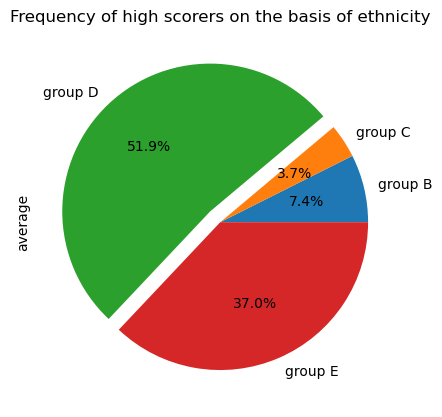

In [49]:
# pie chart
temp_df=high_in_all.groupby('race/ethnicity')['average'].size()
palette_color = sns.color_palette()
g=temp_df.plot(kind='pie',explode=[0,0,0.1,0],autopct='%0.1f%%',colors=palette_color)
g.set_title("Frequency of high scorers on the basis of ethnicity",y=1.02)
plt.show()

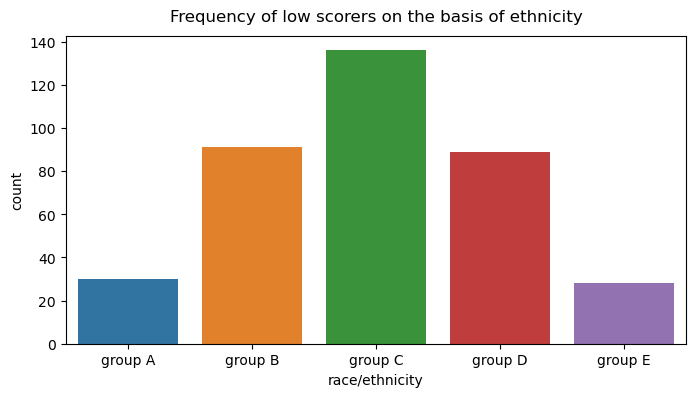

In [53]:
# count plot
fig,ax=plt.subplots(figsize=(8,4))
j=sns.countplot(x="race/ethnicity",data=low_in_all.sort_values(by="race/ethnicity"))
j.set_title("Frequency of low scorers on the basis of ethnicity",y=1.02)
plt.show()

Text(0.5, 1.0, 'PROBABILITY DENSITY FOR WRITING SCORES')

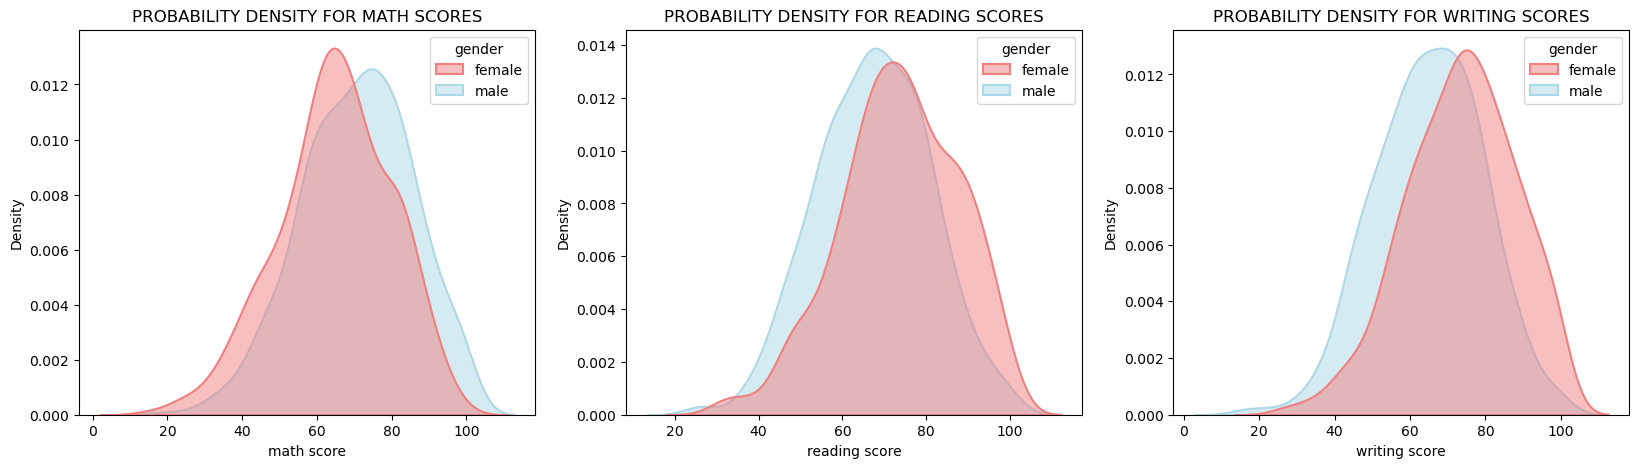

In [56]:
# Chart - 3 visualization code
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
sns.kdeplot(x="math score",data=df,hue='gender',palette={'male':'lightblue','female':'lightcoral'},alpha=.5, linewidth=1.5,fill=True)
plt.title("PROBABILITY DENSITY FOR MATH SCORES")

plt.subplot(1,3,1)
plt.subplot(1,3,2)
sns.kdeplot(x="reading score",data=df,hue='gender',palette={'male':'lightblue','female':'lightcoral'},alpha=.5, linewidth=1.5,fill=True)
plt.title("PROBABILITY DENSITY FOR READING SCORES")

plt.subplot(1,3,1)
plt.subplot(1,3,3)
sns.kdeplot(x="writing score",data=df,hue='gender',palette={'male':'lightblue','female':'lightcoral'},alpha=.5, linewidth=1.5,fill=True)
plt.title("PROBABILITY DENSITY FOR WRITING SCORES")

Text(0.5, 1.0, 'WRITING SCORES OF MALE STUDENTS ON THE BASIS OF TEST PREPARATORY COURSE')

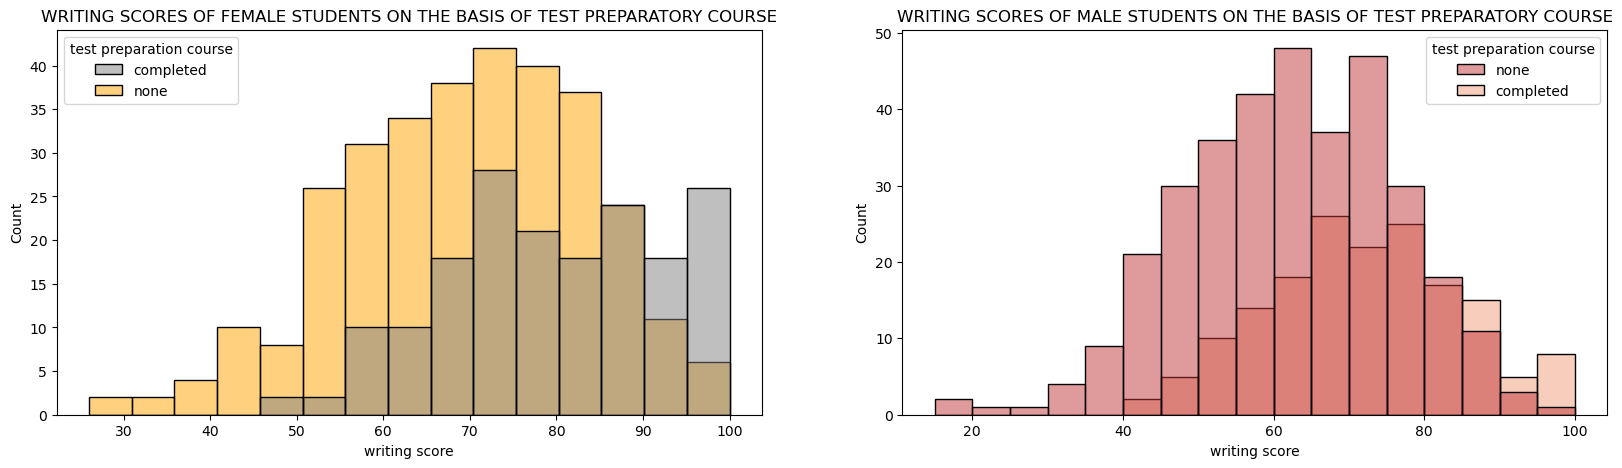

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(x="writing score",data=fstudents,hue='test preparation course',palette={'completed':'grey','none':'orange'})
plt.title("WRITING SCORES OF FEMALE STUDENTS ON THE BASIS OF TEST PREPARATORY COURSE")
custom_palette = sns.set_palette("RdBu")
plt.subplot(1,2,1)
plt.subplot(1,2,2)
sns.histplot(x="writing score",data=mstudents,hue='test preparation course',palette=custom_palette)
plt.title("WRITING SCORES OF MALE STUDENTS ON THE BASIS OF TEST PREPARATORY COURSE")

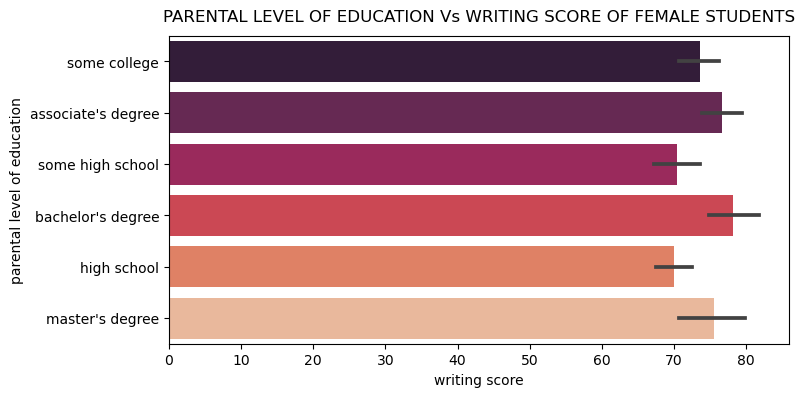

In [59]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(8,4))
custom_palette=sns.set_palette("rocket")
g=sns.barplot(x="writing score",y="parental level of education",data=fstudents)
#plt.xticks(rotation=60)
g.set_title("PARENTAL LEVEL OF EDUCATION Vs WRITING SCORE OF FEMALE STUDENTS",y=1.02)
plt.show()

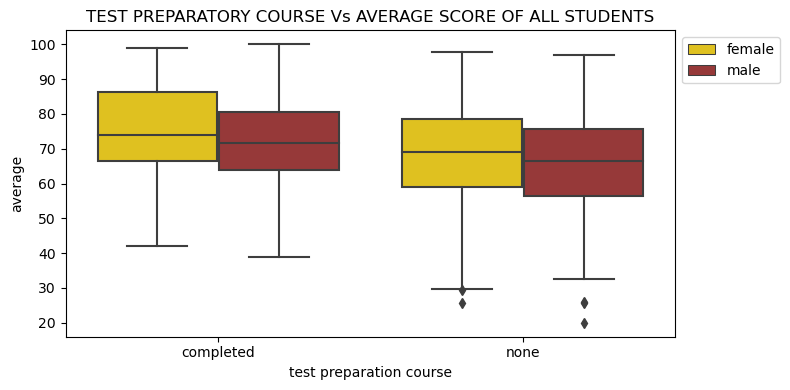

In [61]:

fig,ax=plt.subplots(figsize=(8,4))
g=sns.boxplot(data=df, x='test preparation course',y='average',hue='gender',palette={'male':'brown','female':'gold'})
g.set_title("TEST PREPARATORY COURSE Vs AVERAGE SCORE OF ALL STUDENTS",y=1.0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

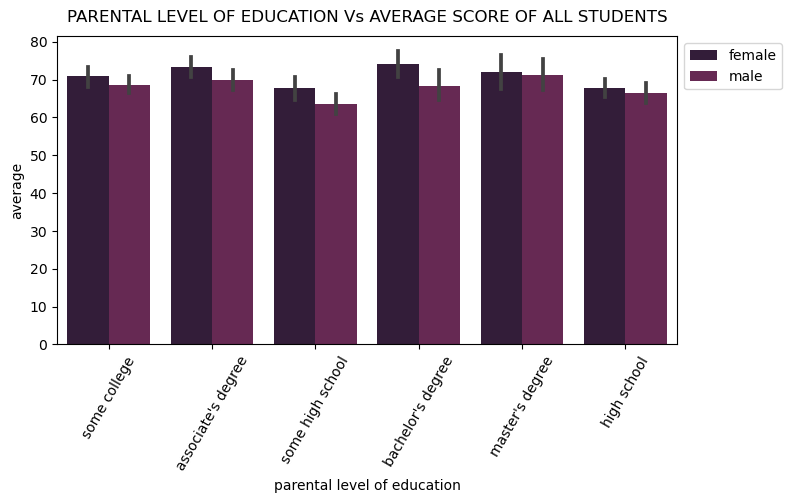

In [71]:

fig,ax=plt.subplots(figsize=(8,4))
g=sns.barplot(y="average",x="parental level of education",data=df,hue='gender')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.xticks(rotation=60)
g.set_title("PARENTAL LEVEL OF EDUCATION Vs AVERAGE SCORE OF ALL STUDENTS",y=1.02)
plt.show()

C:\Users\Shubham thakur\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


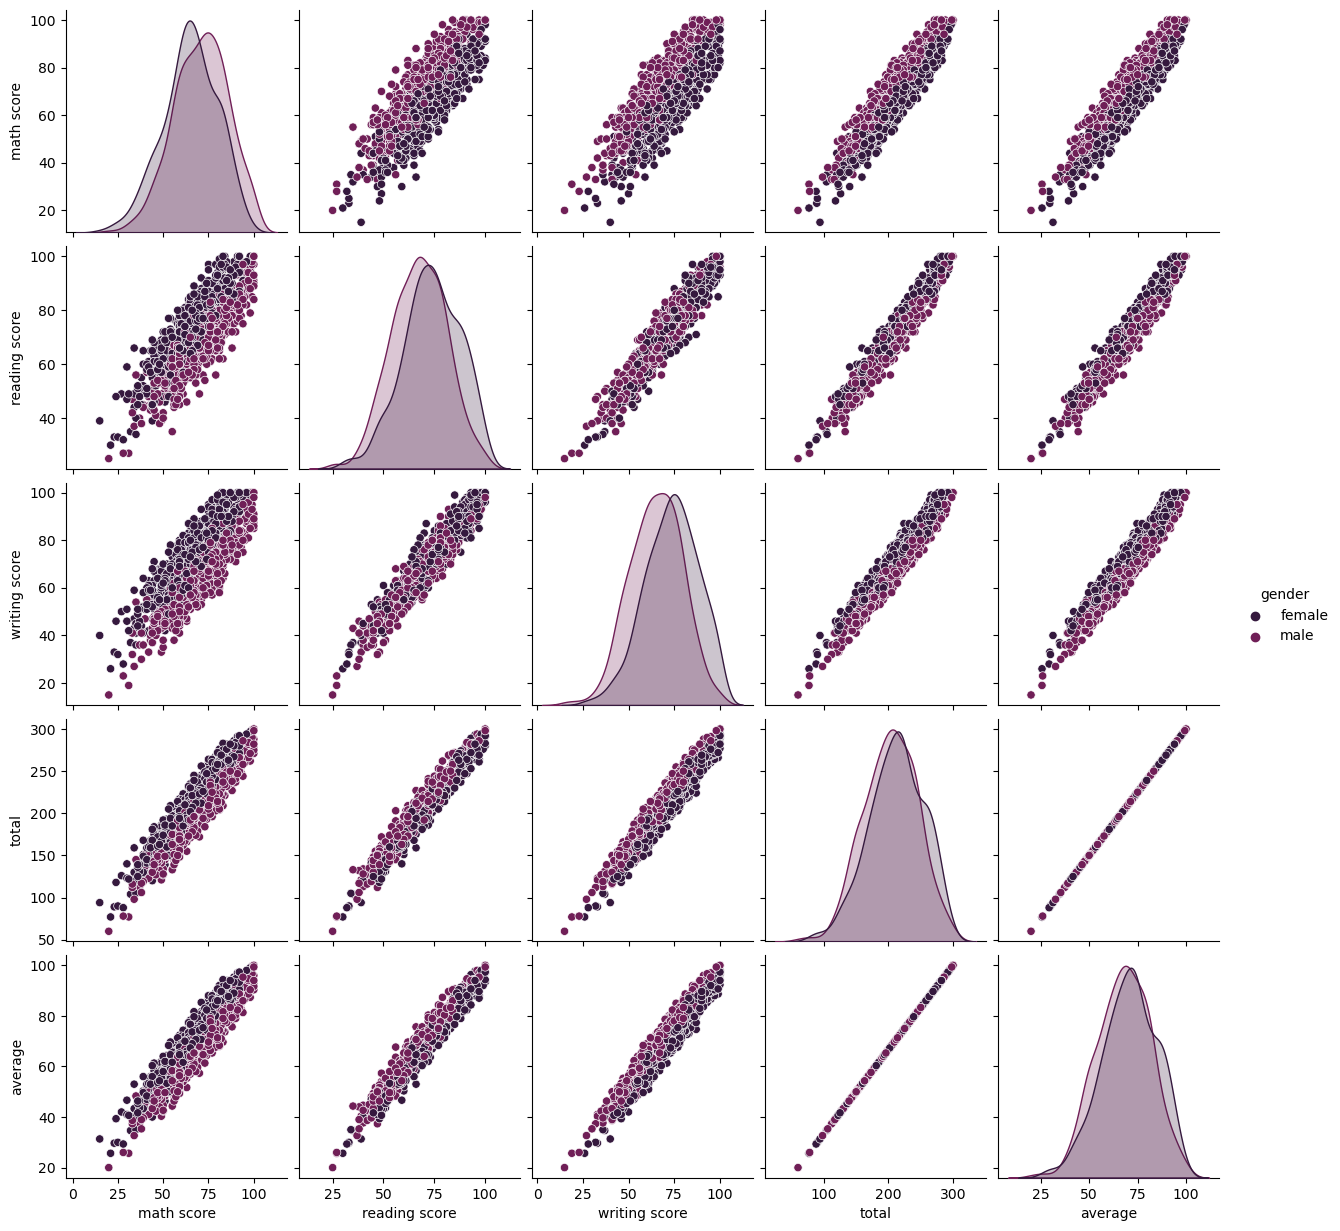

In [70]:

sns.pairplot(data=df,hue='gender')
plt.show()

## Feature Engineering & Data Pre-Processing

As there was no missing values in the data set so we do not need to handle that.

#### Encoding Categorical Columns

In [75]:
col=df[['parental level of education']]
OE=OrdinalEncoder()
data=OE.fit_transform(col)
oe=pd.DataFrame(data,columns=col.columns)

In [76]:
oe

,parental level of education
0,4.0
1,0.0
2,4.0
3,4.0
4,0.0
...,...
995,4.0
996,4.0
997,2.0
998,2.0


In [78]:
cols=df[['gender','race/ethnicity','lunch','test preparation course']]
encoded=pd.get_dummies(cols,drop_first=True)
encoded.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,False,False,False,True,False,True,False
1,True,False,False,True,False,True,True
2,False,False,False,True,False,False,True
3,True,True,False,False,False,False,True
4,False,False,False,True,False,True,True


In [81]:
df=pd.concat([df,encoded,oe],axis=1)
drop_col=['gender','parental level of education','race/ethnicity','test preparation course','lunch']
df.drop(columns=drop_col,inplace=True)
df.head()

,math score,reading score,writing score,total,average,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,race/ethnicity_group E,lunch_standard,test preparation course_none,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,59,70,78,207,69.000000,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
1,96,93,87,276,92.000000,True,False,False,True,False,...,False,True,True,True,False,False,True,False,True,True
2,57,76,77,210,70.000000,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,70,70,63,203,67.666667,True,True,False,False,False,...,False,False,True,True,True,False,False,False,False,True
4,83,85,86,254,84.666667,False,False,False,True,False,...,False,True,True,False,False,False,True,False,True,True


1.I have used ordinal encoding on the column 'parental level of education' because it has an inherent order or ranking among its categories.

2.I have used One hot encoding on the columns viz., 'gender' , 'race/ethnicity' , 'lunch' , 'test preparation course' because they are nominal variables whose categories represent distinct states or labels with no inherent order.

 ## Data Splitting

In [84]:
x=df.drop(columns=['average','total'])
y=df['average']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

I have used 4:1 as the splitting ratio for training data(=80%) and testing data(=20%) repectively.


In [86]:
x

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none,...,race/ethnicity_group E,lunch_standard,test preparation course_none,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,59,70,78,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
1,96,93,87,True,False,False,True,False,True,True,...,False,True,True,True,False,False,True,False,True,True
2,57,76,77,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,True
3,70,70,63,True,True,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,True
4,83,85,86,False,False,False,True,False,True,True,...,False,True,True,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,77,77,71,True,False,True,False,False,True,True,...,False,True,True,True,False,True,False,False,True,True
996,80,66,66,True,False,True,False,False,True,True,...,False,True,True,True,False,True,False,False,True,True
997,67,86,86,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
998,80,72,62,True,False,False,False,True,True,True,...,True,True,True,True,False,False,False,True,True,True


In [87]:
y

0      69.000000
1      92.000000
2      70.000000
3      67.666667
4      84.666667
         ...    
995    75.000000
996    70.666667
997    79.666667
998    71.333333
999    50.000000
Name: average, Length: 1000, dtype: float64

## SVM regression model implementation

In [97]:
from sklearn.svm import SVR
# ML Model - 1 Implementation

model = SVR(kernel='linear')

# Train the SVR model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
svr_y_pred = model.predict(x_test)

In [100]:
# Visualizing evaluation Metric Score chart
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_y_pred)
# svr_adjusted_r2 = 1-(1-r2_score((y_test), (svr_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

print("Mean Absolute Error:",svr_mae)
print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("R-squared (R2) Score:", svr_r2)
# print("Adjusted R2 Score:",svr_adjusted_r2)

Mean Absolute Error: 0.03605862979817639
Mean Squared Error: 0.001969631382373947
Root Mean Squared Error: 0.04438052931606322
R-squared (R2) Score: 0.9999906939885662


In [94]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.square(mse)

print("Mean Absolute Error:",svr_mae)
print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("R-squared (R2) Score:", svr_r2)
print("Adjusted R2 Score:",svr_adjusted_r2)

r2 score is:  1.0
Mean Squared Error: 1.8686537122875327e-28
R-squared: 1.0


In [101]:
SVR_Dataframe = pd.DataFrame(zip(y_test, svr_y_pred), columns = ['actual', 'predicted'])
SVR_Dataframe

,actual,predicted
0,79.000000,78.983224
1,81.333333,81.296930
2,49.000000,49.025028
3,48.000000,48.065406
4,70.333333,70.287317
...,...,...
195,71.333333,71.288522
196,55.666667,55.676206
197,83.333333,83.315420
198,94.333333,94.259711


Support Vector Regression (SVR) is a powerful algorithm that can be used for regression tasks in machine learning. SVR can capture complex patterns and provide accurate predictions. It can handle non-linear relationships by using different kernel functions such as radial basis function (RBF), polynomial, or sigmoid.

SVR is particularly useful in the following scenarios:

Small to Medium-Sized Datasets: SVR tends to perform well on datasets with a moderate number of samples. It can handle datasets with thousands to tens of thousands of samples efficiently and effectively.

Data with Outliers: SVR is robust to outliers in the data. It uses a loss function that penalizes outliers less compared to traditional linear regression methods, making it suitable for datasets with noisy or outlying data points.

Based on the above evaluation metric scores, the SVR model appears to perform exceptionally well. It demonstrates low errors (MAE, MSE, RMSE), high explanatory power (R2 score), and robust performance even after considering model complexity (Adjusted R2 score). These results indicate that the SVR model fits the data very well and makes accurate predictions.

## Random Forest Model Implementation

In [103]:
# ML Model - 2 Implementation
model=RandomForestRegressor(n_estimators=10, random_state=0)

# Fit the Algorithm
model.fit(x_train,y_train)

# Predict on the model
rf_y_pred = model.predict(x_test)

In [105]:
# Visualizing evaluation Metric Score chart
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_adjusted_r2 = 1-(1-r2_score((y_test), (rf_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))



print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared (R2) Score:", rf_r2)
print("Adjusted R2 Score:",rf_adjusted_r2)

Mean Squared Error: 0.7997999999999995
Mean Absolute Error: 0.643
Root Mean Squared Error: 0.8943153806124546
R-squared (R2) Score: 0.9962211467529749
Adjusted R2 Score: 0.9957029040219543


In [106]:
Rf_Dataframe = pd.DataFrame(zip(y_test, rf_y_pred), columns = ['actual', 'predicted'])
Rf_Dataframe

,actual,predicted
0,79.000000,78.500000
1,81.333333,79.066667
2,49.000000,52.466667
3,48.000000,47.733333
4,70.333333,71.233333
...,...,...
195,71.333333,70.966667
196,55.666667,55.966667
197,83.333333,82.266667
198,94.333333,93.800000


Random Forest Regressor is a type of ensemble learning model used in machine learning for regression tasks. It's an extension of the decision tree algorithm, but instead of relying on a single decision tree, it operates by constructing a multitude of decision trees during training and outputs the average prediction of the individual trees (regression) as its final prediction.

Here's how the Random Forest Regressor works:

Ensemble of Decision Trees: A Random Forest consists of a large number of individual decision trees. Each tree is trained independently on a random subset of the training data (bootstrap sample) and a random subset of features at each split. This randomness helps to ensure diversity among the trees.

Decision Making: During training, each decision tree learns to make predictions by recursively splitting the feature space into regions, based on the feature values, that minimize the variance of the target variable within each region. This process continues until a stopping criterion is met (e.g., maximum depth of the tree, minimum number of samples required to split a node).

Prediction: When making predictions with a Random Forest Regressor, each individual tree in the forest independently predicts the target variable. The final prediction is then calculated by averaging the predictions of all the individual trees (for regression tasks). Alternatively, the median prediction can be used, which can be more robust to outliers.

Based on the above evaluation metrics, the Random Forest Regressor model appears to perform exceptionally well on the given dataset, with very low errors and a high R-squared score, indicating strong predictive performance and a good fit to the data.

### Decision Tree Regressor model -Model 3

In [109]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)

# Fit the Algorithm
model.fit(x_train,y_train)

# Predict on the model
dt_y_pred = model.predict(x_test)

In [110]:
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_adjusted_r2 = 1-(1-r2_score((y_test), (dt_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("Root Mean Squared Error:", dt_rmse)
print("R-squared (R2) Score:", dt_r2)
print("Adjusted R-squared (R2) Score:", dt_adjusted_r2)

Mean Squared Error: 3.628888888888889
Mean Absolute Error: 1.1866666666666668
Root Mean Squared Error: 1.90496427496394
R-squared (R2) Score: 0.9828544154027616
Adjusted R-squared (R2) Score: 0.9805030209437118


In [111]:
DT_Dataframe = pd.DataFrame(zip(y_test, dt_y_pred), columns = ['actual', 'predicted'])
DT_Dataframe

,actual,predicted
0,79.000000,78.000000
1,81.333333,81.666667
2,49.000000,53.333333
3,48.000000,48.000000
4,70.333333,72.000000
...,...,...
195,71.333333,72.000000
196,55.666667,57.000000
197,83.333333,80.666667
198,94.333333,94.666667


A Decision Tree Regressor is a supervised learning algorithm used for regression tasks. It works by recursively partitioning the feature space into smaller regions and making predictions based on the average of the target variable within each region. Here's a brief overview of how it works:

Splitting Criteria: Decision trees make decisions by splitting the feature space into subsets based on certain criteria. The criteria typically used for splitting include minimizing variance or maximizing information gain.

Recursive Partitioning: Starting from the root node, the decision tree recursively splits the data into smaller subsets based on the chosen splitting criteria. Each split creates branches that lead to child nodes.

Leaf Nodes and Predictions: The process continues until a stopping criterion is met, such as reaching a maximum tree depth or having a minimum number of samples in each leaf node. At this point, the terminal nodes are called leaf nodes. Each leaf node contains a prediction value, typically the mean or median of the target variable within that node's subset.

Prediction: To make a prediction for a new data point, the decision tree traverses the tree from the root node down to a leaf node, following the path determined by the feature values of the data point. The prediction for the data point is then based on the prediction value stored in the leaf node.

Model Interpretability: One of the key advantages of decision trees is their interpretability. The structure of the tree can be visualized and understood easily, making it intuitive to interpret how the model makes predictions.

Based on the above evaluation metric scores, the Decision Tree Regressor model appears to perform exceptionally well. It demonstrates low errors (MAE, MSE, RMSE), high explanatory power (R2 score), and robust performance even after considering model complexity (Adjusted R2 score). These results indicate that the Decision Tree Regressor model fits the data very well and makes accurate predictions.

### Evaluation metric we choose
R-squared (R2) Score: Importance: R2 score measures the proportion of variance in the dependent variable explained by the independent variables. A higher R2 score indicates a better fit of the model to the data, providing more reliable predictions.

Business Impact: A higher R2 score assures stakeholders that the model captures a significant portion of the variability in the data, enhancing confidence in decision-making. In marketing, for instance, a higher R2 score in predicting customer behavior can lead to more targeted marketing campaigns, increased customer engagement, and improved return on investment.

## Model We Choose
I choose Support Vector Regression model as my final model (with highest R2 score and least errors) for predictions because it is performing better than the other two models

## Conclusion

In [112]:

model_data = pd.DataFrame()
model_data['Model Name'] = ['Support Vector Regression','Decision Tree Regressor','Random Forest Regressor']
model_data['MAE'] = [svr_mae,dt_mae,rf_mae]
model_data['MSE'] = [svr_mse,dt_mse,rf_mse]
model_data['RMSE'] = [svr_rmse,dt_rmse,rf_rmse]
model_data['R2'] = [svr_r2,dt_r2,rf_r2]
model_data['Adjusted R2'] = [svr_adjusted_r2,dt_adjusted_r2,rf_adjusted_r2]
model_data

,Model Name,MAE,MSE,RMSE,R2,Adjusted R2
0,Support Vector Regression,0.036059,0.001970,0.044381,0.999991,0.999989
1,Decision Tree Regressor,1.186667,3.628889,1.904964,0.982854,0.980503
2,Random Forest Regressor,0.643000,0.799800,0.894315,0.996221,0.995703
